In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set size for plots
plt.rcParams['figure.figsize'] = (14.0, 8.0)
sns.set(rc={'figure.figsize':(14.0,8.0)})

notes
initial temp = room
x, y - spatial dimension
t - time
T - Kalwins as unit (as i want)
K - therma conductivity
cw - specific heat
Heater contact = 100 C

condition type 2
derivate in insolted part is 0

The whole plate should have the same temp. Sould higher than initial. 

Results
Verify simulation with theory for every metal. Compare them.

Size of plat 10x10
heater 2x2
h = 0.005 m
boundary condition 1
T1 = 100
T2 = 10
boundry condition 2
P = 100
th = 10
B = edge is isolated - boundary particle value is the same as pre-boundary

Don't consider boundar particles in equation, they are formulated in boundary condition

Only first boundary condition
Steady state of three matels, compare them
Numerical stability
Demonstrate temparature distribution

In [108]:
# intput data
A = 0.1 #m
B = 0.02 #m
h = 0.005 #m

#NX, NY number of paritcles in rows and cols
nx = ny = 5
#dx, dy distance betweeb particles in rows and cols
dx = A/nx
dy = A/ny

#time grid
t_sim = 5 #s        TIME 
dt =  1e-3 #s         Time step
nt  = int(t_sim/dt) # Number of time step

In [109]:
# first boundary condition
T1 = 100
T2 = 10

T = np.ones((nx, ny)) * T2

# heater placement
up_shift = int(0.5*nx - 0.5*B/dx)
down_shift = int(0.5*ny + 0.5*B/dx)
heater_size = (down_shift - up_shift) * dx
print("Sanity check. Size of heater %.2f" %heater_size)
T[up_shift:down_shift,up_shift:down_shift] = 100

Sanity check. Size of heater 0.02


In [ ]:
#material properties
print('Please pick one metal to be tested. (alumina, cooper, stainless steel)')
material = input()
if material == 'alumina':
    #alumina
    p = 2700 #kg/m^3
    cw = 900 #J/kgK
    K = 237 #W/mK
elif material == 'cooper':
    #cooper
    p = 8920 #kg/m^3
    cw = 380 #J/kgK
    K = 401 #W/mK
elif material == 'stainless steel':
    #stainless steel
    p = 7869 #kg/m^3
    cw = 450 #J/kgK
    K = 58 #W/mK
else:
    return print('Non known material. Sorry :(')

Text(66.5, 0.5, 'Y')

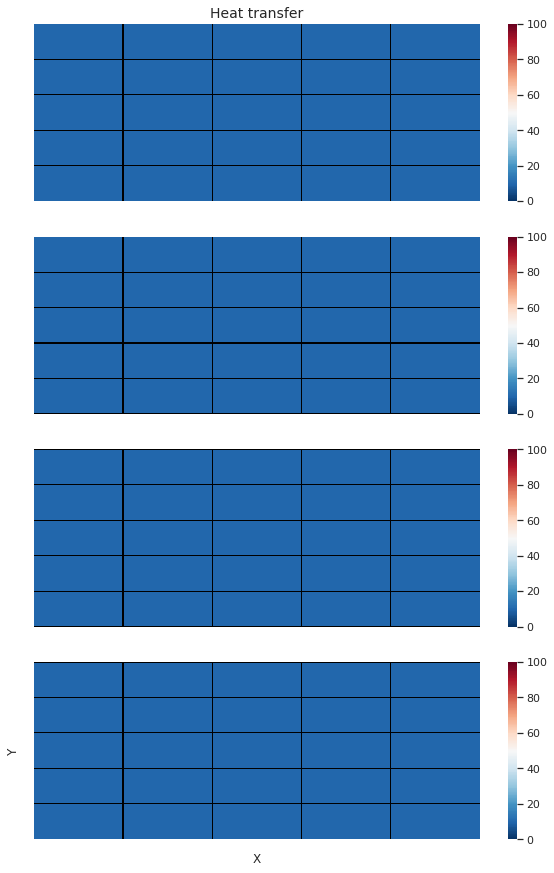

In [129]:
#campure few plate states
fig, axes = plt.subplots(4, 1, figsize=(10,15))
axes[0].set_title('Heat transfer', fontsize=14)
state = [0, int(nt/8), int(nt/4), nt-1]
no_plot = 0

for n in range(nt):
    #nx-1 and ny-1 beacuse we don't change boundary values
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_pref = T[i,j]
            dT1_num = T[i+1, j] - 2 * T[i, j] + T[i-1, j]
            dT2_num = T[i, j+1] - 2 * T[i, j] + T[i, j-1]
            const = (K * dt)/(cw * p)
            T[i,j] = T_pref + const / (dx**2) * dT1_num + const / (dy**2) *dT2_num

    if n in state:
        sns.heatmap(T, cmap=sns.color_palette("RdBu_r", 200), vmin=0, vmax=100, ax=axes[no_plot], linewidths=.1, linecolor='black')
        axes[no_plot].xaxis.set_ticklabels([])
        axes[no_plot].yaxis.set_ticklabels([])
        no_plot += 1
                
axes[no_plot-1].set_xlabel('X')
axes[no_plot-1].set_ylabel('Y')